In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Carregando arquivo pro DF
ExamesDF = pd.read_csv('/home/rafnaves/estudos/rocketseat/IA/modelo_diabetes/datasets/1698696961761-attachment.csv')

In [12]:
# Vizualizando Estrutura
ExamesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [13]:
# Vizualizando 10 Primeiras linhas
ExamesDF.head(10)

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100
5,6,M,64,93,190,117
6,7,F,21,70,182,90
7,8,F,60,101,179,84
8,9,F,63,83,189,92
9,10,F,65,78,175,121


In [14]:
# Removendo coluna id_paciente
ExamesDF.drop(columns=['id_paciente'], axis=1, inplace=True)

In [15]:
# Convertendo uma variavel categorica (Genero) em numerica, 
# usando One_hot Encoding

ExamesDF = pd.get_dummies(ExamesDF, columns=['genero'], dtype='int64')
ExamesDF

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1
...,...,...,...,...,...,...
95,52,96,183,89,1,0
96,68,108,169,105,1,0
97,21,95,154,125,0,1
98,41,109,173,128,0,1


<Axes: >

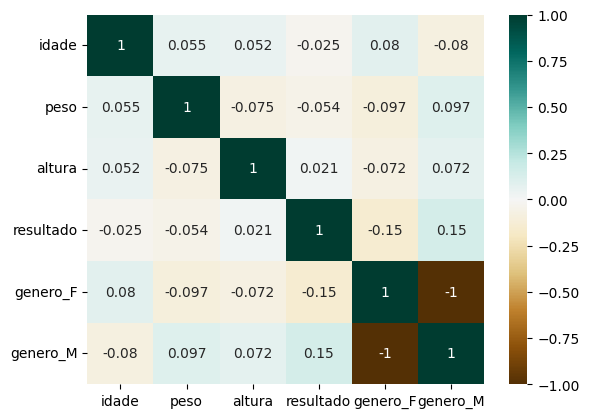

In [16]:
# Apresentando Mapa de Calor com Correlação entre as variáveis
sns.heatmap(ExamesDF.corr(), annot=True, vmin=-1, vmax=1, cmap='BrBG')

<Axes: >

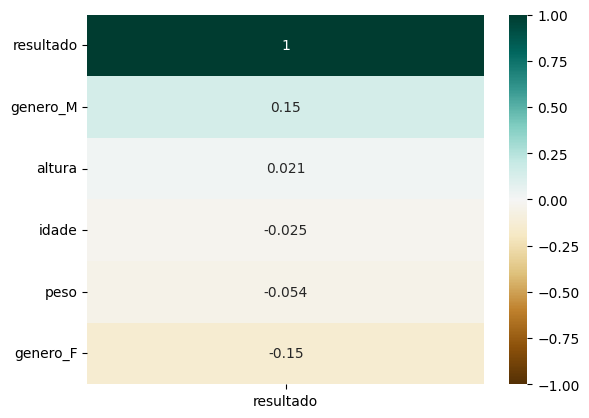

In [17]:
# Mapa de Correlação só com a variável target (resultado)
sns.heatmap(ExamesDF.corr()[['resultado']].sort_values(by='resultado', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>],
       [<Axes: xlabel='idade', ylabel='resultado'>,
        <Axes: xlabel='peso', ylabel='resultado'>,


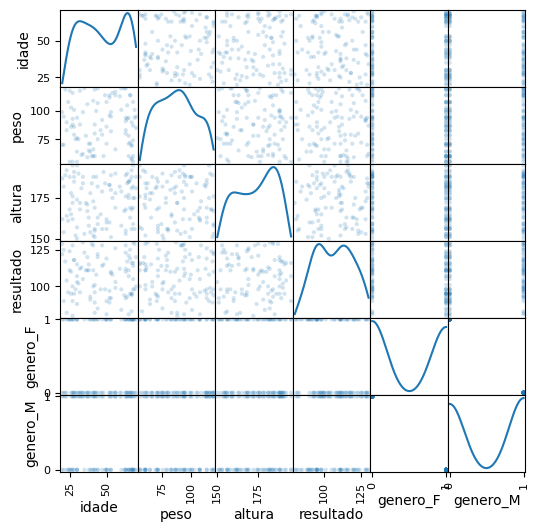

In [18]:
# Plot de Scatter (Dispersão) com Distribuição
pd.plotting.scatter_matrix(ExamesDF, alpha=0.2, figsize=(6,6), diagonal='kde')

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>],
       [<Axes: title={'center': 'resultado'}>,
        <Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>]], dtype=object)

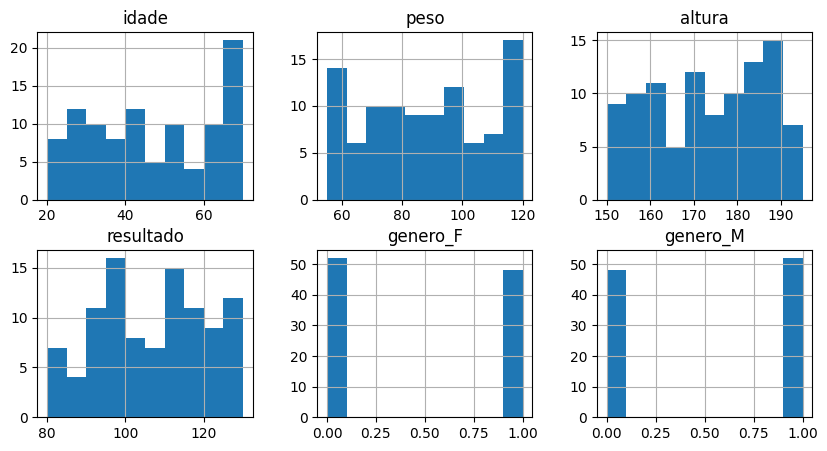

In [19]:
# Histograma de todas as variáveis
ExamesDF.hist(layout=(2,3), figsize=(10, 5))

In [20]:
# Criando uma feature nova
# Engenharia de features
# IMC (indice de massa corporal)
# IMC = peso / altura^2
ExamesDF['imc'] = ExamesDF['peso']/((ExamesDF['altura']/100)**2)
ExamesDF.head(5)

,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682


<Axes: >

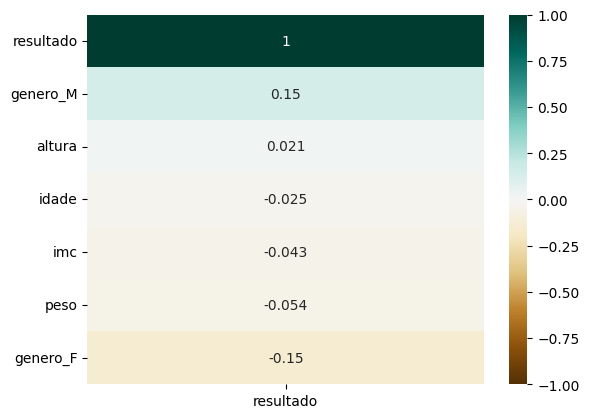

In [20]:
sns.heatmap(ExamesDF.corr()[['resultado']].sort_values(by='resultado', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

<Axes: >

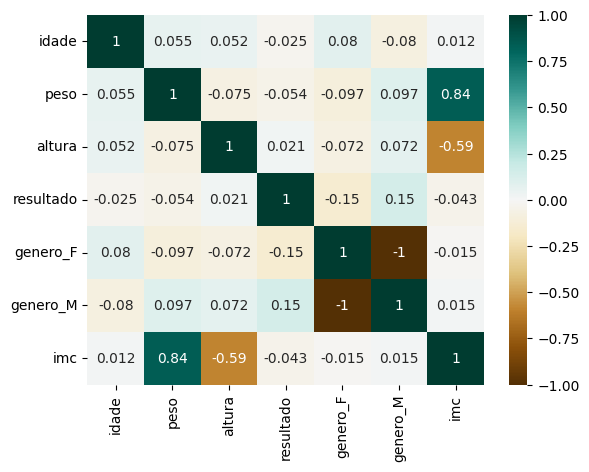

In [21]:
sns.heatmap(ExamesDF.corr(), annot=True, vmin=-1, vmax=1, cmap='BrBG')

In [22]:
# Importar bibliotecas do sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [26]:
# Modelo 1 - Sem IMC
X = ExamesDF.drop(columns=['imc', 'resultado'])
Y = ExamesDF['resultado']



In [30]:
# Dividir conjunto entre treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=51)

In [35]:
len (Y_test)

30

In [33]:
# Treinar algoritmo de Regressão Linear - Modelo 1
model_1 = LinearRegression().fit(X_train, Y_train)

In [34]:
# Gerar Predições do conjunto de testes com base no Modelo 1
y_pred = model_1.predict(X_test)
y_pred

array([ 99.6684178 , 111.15467732, 113.11211654, 108.92788908,
       106.38206401, 107.30939688, 109.65461594, 112.00335574,
       111.06900447, 109.78672617, 112.35808062, 112.28232464,
       111.9380202 , 108.10634945,  98.35810505, 108.24066307,
       107.47444699, 107.86866238, 108.45528721, 106.47405474,
       108.68462818, 107.39800684, 105.52920918, 101.5310878 ,
       107.73027652, 103.02436766, 105.65307386, 112.03833836,
       105.49217347, 100.44933075])

In [36]:
# R2 Score
model_1.score(X_train, Y_train)

0.06218388634297234

In [37]:
# R2 Score 
model_1.score(X_test,Y_test)

-0.1364090447910642

In [38]:
mean_absolute_error(Y_test, y_pred)

12.695569181179541

In [40]:
# Segundo Modelo - Apenas IMC
X = pd.DataFrame(ExamesDF['imc'])
y = ExamesDF['resultado']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [41]:
# Treinar o novo modelo
model_2= LinearRegression().fit(X_train, y_train)

In [43]:
y_pred = model_2.predict(X_test)
model_2.coef_

array([-0.21677589])

In [44]:
model_2.intercept_

np.float64(112.15019229088836)

In [45]:
# R2 SCORE NO conjunto de treinamento
model_2.score(X_train, y_train)

0.015285962664806862

In [46]:
# Conjunto de testes
model_2.score(X_test, y_test)

-0.0889832856240178

In [48]:
# MAE mean absolute error
mean_absolute_error(y_test, y_pred)

12.505651407060103

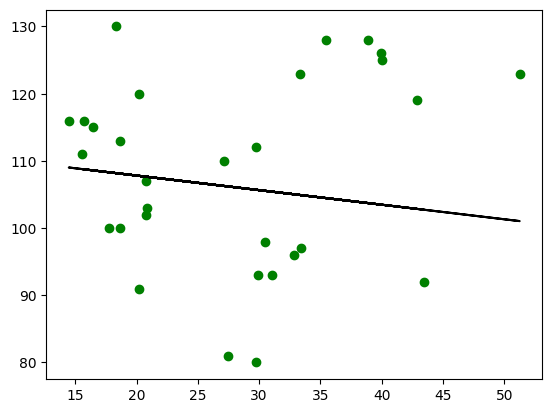

In [50]:
plt.scatter(X_test, y_test, color='g')
plt.plot(X_test, y_pred, color = 'k')